Team name here

# MNIST Tutorial for CIS 4115

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print ("====== This should generate a FutureWaring on Conversion ===== ignore this warning")
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

====== This should generate a FutureWaring on Conversion ===== ignore this warning


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
print ("Numpy version " , np.__version__)
print ("Keras version " , keras.__version__)

Numpy version  1.14.2
Keras version  2.1.5


# Import the MNIST data
Display some sample images and the shape of the data to make sure the import worked


In [4]:
from keras.datasets import mnist
# Load pre-shuffled MNIST data into train and test sets
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Kaggle uses a different set of MNIST images so don't load the built in Keras dataset")


Kaggle uses a different set of MNIST images so don't load the built in Keras dataset


In [5]:
# Read data from the actual Kaggle download files instead
# Pull out the labels or output which are saved in first index
# Convert remaining values to floats
train = pd.read_csv('train.csv')
labels = train.iloc[:,0].values.astype('int32')
X_train = (train.iloc[:,1:].values).astype('float32')
X_test = (pd.read_csv('test.csv').values).astype('float32')
#reshape as 28x28 pixel images
KX_train = X_train.reshape(X_train.shape[0], 28, 28)
KX_test = X_test.reshape(X_test.shape[0], 28, 28)

In [6]:
print ("Training data is 60,000 images each 28x28 pixels greyscale: " ,X_train.shape)
print ("Testing data is 10,000 images each 28x28 pixels greyscale: " ,X_test.shape)

Training data is 60,000 images each 28x28 pixels greyscale:  (42000, 784)
Testing data is 10,000 images each 28x28 pixels greyscale:  (28000, 784)


Use the following code to display a sample of any image. 

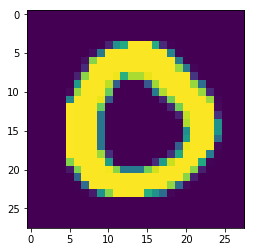

In [7]:
from matplotlib import pyplot as plt
plt.imshow(KX_train[4])

## Reshape data
Keras expects inputs with three values for images. Generally the x, y, and depth of the image. So a 3x4 image 
Data we are starting with with shape of (3, 4) <br>
[ [ 9 9 9 ] <br>
&nbsp;&nbsp;[ 9 9 9 ] <br>
&nbsp;&nbsp;[ 9 9 9 ] <br>
&nbsp;&nbsp;[ 9 9 9 ] ] <br>
Data format after reshape that keras needs with with shape of (3, 4, 1) <br>
[ [ [ 9 9 9 ] <br>
&nbsp;&nbsp;&nbsp;[ 9 9 9 ] <br>
&nbsp;&nbsp;&nbsp;[ 9 9 9 ] <br>
&nbsp;&nbsp;&nbsp;[ 9 9 9 ] ] ]<br>

In [8]:
train_size = X_train.shape[0]
test_size = X_test.shape[0]
X_train = X_train.reshape(train_size, 28, 28, 1)
X_test = X_test.reshape(test_size, 28, 28, 1)
print ("Shape of training input before reshaping ", X_train.shape)
print("First image data before normalizing")
print (X_train[:1])
#reshape for dense-only inputs
X_train_dense = X_train.reshape(train_size, 28 * 28)
X_test_dense = X_test.reshape(test_size, 28 * 28)

Shape of training input before reshaping  (42000, 28, 28, 1)
First image data before normalizing
[[[[  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]]

  [[  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0.]
   [  0

# Normalize image data
Greyscale pixel data is stored as integer values between 0-255.
<br>
Neural networks expect inputs between 0-1, so divide each pixel by 255 to normalize it. Also change the 

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train_norm = X_train / 255
X_test_norm = X_test / 255


#Do the same for the dense input
X_train_dense = X_train_dense.astype('float32')
X_test_dense = X_test_dense.astype('float32')
X_train_dense = X_train_dense / 255
X_test_dense = X_test_dense / 255

# Reformat the output data

Output data is stored in arrays named "y" or y_train and y_test. <br>
Initiailly this is just the number, 0-9, that is represented by the image. <br>
Output should be an array of 10 different values each 0 or 1. <br>
So, convert 4 into [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

In [10]:
print ("First 10 entries in output data before reformatting ",labels[:10])


First 10 entries in output data before reformatting  [1 0 1 4 0 0 7 3 5 3]


In [11]:
Y_train = np_utils.to_categorical(labels, 10)
# Kaggle does not provide the testing results--we must generate and submit these
# Y_test = np_utils.to_categorical(y_test, 10)
print ("Shape of output data after reformatting ",Y_train.shape)
print ("First 10 entries in output data after reformatting ")
print (Y_train[:10])


Shape of output data after reformatting  (42000, 10)
First 10 entries in output data after reformatting 
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# Set up the Neural Network
First, define the neural network layers in the model <br>
Second, compile the model to build it <br>
Third, train the model using the fit command

### Setup and train simple 3-layer model

In [12]:
Simple_3layer_model = Sequential()
Simple_3layer_model.add(Dense(32, activation='relu', input_dim=(28*28)))
Simple_3layer_model.add(Dense(32, activation='relu'))
Simple_3layer_model.add(Dense(10, activation='softmax'))
print ("Neural Network Model created")


Neural Network Model created


In [13]:
# Compile model
Simple_3layer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#  Fit model on training data for network with dense input layer
batch_size = 64
epochs = 5
Simple_3layer_model.fit(X_train_dense, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2)


Epoch 1/5
 - 2s - loss: 0.4591 - acc: 0.8711
Epoch 2/5
 - 2s - loss: 0.2092 - acc: 0.9384
Epoch 3/5
 - 2s - loss: 0.1669 - acc: 0.9506
Epoch 4/5
 - 2s - loss: 0.1414 - acc: 0.9586
Epoch 5/5
 - 1s - loss: 0.1231 - acc: 0.9629


In [15]:
Simple_3layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Set up and train CNN model

In [16]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
print ("Neural Network Model created")

Neural Network Model created


In [17]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Fit model on training data for network with CNN input layer
batch_size = 64
epochs = 20

#model.fit(X_train, Y_train, batch_size=32, epoch=10, verbose=1)
model.fit(X_train_norm, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2)


Epoch 1/20
 - 28s - loss: 0.0373 - acc: 0.9883
Epoch 2/20
 - 28s - loss: 0.0300 - acc: 0.9902
Epoch 3/20
 - 28s - loss: 0.0278 - acc: 0.9906
Epoch 4/20
 - 29s - loss: 0.0268 - acc: 0.9910
Epoch 5/20
 - 29s - loss: 0.0217 - acc: 0.9924
Epoch 6/20
 - 29s - loss: 0.0199 - acc: 0.9932
Epoch 7/20
 - 30s - loss: 0.0198 - acc: 0.9930
Epoch 8/20
 - 32s - loss: 0.0165 - acc: 0.9946
Epoch 9/20
 - 29s - loss: 0.0146 - acc: 0.9953
Epoch 10/20
 - 29s - loss: 0.0136 - acc: 0.9955
Epoch 11/20
 - 28s - loss: 0.0157 - acc: 0.9946
Epoch 12/20
 - 27s - loss: 0.0120 - acc: 0.9960
Epoch 13/20
 - 27s - loss: 0.0131 - acc: 0.9958
Epoch 14/20
 - 27s - loss: 0.0117 - acc: 0.9962
Epoch 15/20
 - 27s - loss: 0.0104 - acc: 0.9965
Epoch 16/20
 - 27s - loss: 0.0101 - acc: 0.9965
Epoch 17/20
 - 28s - loss: 0.0102 - acc: 0.9965
Epoch 18/20
 - 27s - loss: 0.0093 - acc: 0.9969
Epoch 19/20
 - 27s - loss: 0.0106 - acc: 0.9964
Epoch 20/20
 - 28s - loss: 0.0084 - acc: 0.9973


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                73760     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total para

In [20]:
print("Generating test predictions...")
preds = model.predict_classes(X_test_norm, verbose=2)

Generating test predictions...


In [21]:
def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)


In [22]:
write_preds(preds, "minst_kaggle_results.csv")

In [43]:
model = Sequential()
model.add(Conv2D(18, kernel_size=(2, 2), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(18, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
print ("Neural Network Model created")

Neural Network Model created


In [44]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Fit model on training data for network with CNN input layer
batch_size = 64
epochs = 35

#model.fit(X_train, Y_train, batch_size=32, epoch=10, verbose=1)
model.fit(X_train_norm, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2)


Epoch 1/35
 - 24s - loss: 0.3010 - acc: 0.9117
Epoch 2/35
 - 24s - loss: 0.1036 - acc: 0.9686
Epoch 3/35
 - 23s - loss: 0.0758 - acc: 0.9767
Epoch 4/35
 - 24s - loss: 0.0626 - acc: 0.9801
Epoch 5/35
 - 24s - loss: 0.0518 - acc: 0.9831
Epoch 6/35
 - 23s - loss: 0.0415 - acc: 0.9871
Epoch 7/35
 - 24s - loss: 0.0373 - acc: 0.9875
Epoch 8/35
 - 23s - loss: 0.0299 - acc: 0.9897
Epoch 9/35
 - 23s - loss: 0.0275 - acc: 0.9903
Epoch 10/35
 - 23s - loss: 0.0245 - acc: 0.9918
Epoch 11/35
 - 23s - loss: 0.0232 - acc: 0.9920
Epoch 12/35
 - 23s - loss: 0.0210 - acc: 0.9928
Epoch 13/35
 - 23s - loss: 0.0187 - acc: 0.9939
Epoch 14/35
 - 23s - loss: 0.0174 - acc: 0.9941
Epoch 15/35
 - 23s - loss: 0.0165 - acc: 0.9943
Epoch 16/35
 - 23s - loss: 0.0160 - acc: 0.9947
Epoch 17/35
 - 23s - loss: 0.0146 - acc: 0.9951
Epoch 18/35
 - 23s - loss: 0.0104 - acc: 0.9965
Epoch 19/35
 - 23s - loss: 0.0118 - acc: 0.9960
Epoch 20/35
 - 23s - loss: 0.0116 - acc: 0.9960
Epoch 21/35
 - 23s - loss: 0.0098 - acc: 0.9966
E

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 27, 27, 18)        90        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 18)        1314      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 18)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 18)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3042)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                97376     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total para

In [51]:
print("Generating test predictions...")
preds = model.predict_classes(X_test_norm, verbose=2)

Generating test predictions...


In [52]:
def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

In [53]:
write_preds(preds, "minst_kaggle_results.csv")